## K Nearest Neighbor Illustration

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples = 100, centers=2, cluster_std = 4.0, random_state=20)# Generates data with labels

In [3]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=42)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)
plt.scatter(X_test[:, 0], X_test[:, 1], c="red",marker = "D", s=80)
plt.show()

NameError: name 'train_test_split' is not defined

In [113]:
k_value = 1
knn = KNeighborsClassifier(k_value)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [114]:
result = knn.predict(X_test)

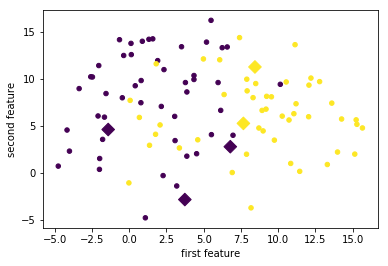

In [115]:
marker = np.append(y_train,result, axis=0)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)
plt.scatter(X_test[:, 0], X_test[:, 1], c=result,marker = "D", s=80)
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.show()

In [116]:
print("accuracy: {:.2f}".format(knn.score(X_test, y_test)))
y_pred = knn.predict(X_test)

accuracy: 0.80


In [117]:
# Plot the decision boundary
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
# Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
np.arange(y_min, y_max, 0.02))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

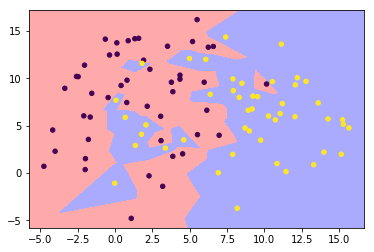

In [118]:
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)
plt.show()